In [1]:
import pandas as pd
from xgboost import XGBRegressor
from function import split_data

# 读取数据
data = pd.read_csv("../data/dataset.csv")
X_train, X_test, y_train, y_test = split_data(data)

# 训练XGBoost回归模型
xgb = XGBRegressor(n_estimators=280,
                   learning_rate=0.09,
                   subsample=0.64,
                   gamma=0.3,
                   max_depth=18,
                   min_child_weight=9,
                   reg_alpha=0.5,
                   colsample_bytree=0.8,
                   colsample_bylevel=0.6,
                   colsample_bynode=0.6,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

[{'grid_values': [array([0.1   , 0.26  , 0.27  , 0.315 , 0.32  , 0.38  , 0.41  , 0.447 ,
          0.448 , 0.5043, 0.54  , 0.55  , 0.551 , 0.575 , 0.5753, 0.58  ,
          0.72  , 0.721 , 0.77  , 0.78  , 0.784 , 0.79  , 0.81  , 0.83  ,
          0.86  , 0.9   , 0.918 , 0.93  , 0.95  , 0.96  , 1.    , 1.03  ,
          1.07  , 1.1   , 1.133 , 1.2   , 1.23  , 1.29  , 1.331 , 1.384 ,
          1.41  , 1.54  , 1.56  , 1.57  , 1.63  , 1.67  , 1.7   , 1.71  ,
          1.74  , 1.75  , 1.77  , 1.81  , 1.93  , 1.953 , 2.071 , 2.14  ,
          2.17  , 2.18  , 2.42  , 2.482 , 2.756 , 3.04  , 3.428 ]),
   array([ 0.        ,  9.2       ,  9.5065312 ,  9.71880762,  9.94749125,
          10.68514519, 10.84337349, 11.11111111, 11.19942197, 14.5631068 ,
          15.11627907, 15.51724138, 15.99516519, 18.87240356, 19.33701657,
          20.48819528, 20.93023256, 20.96168295, 21.68674699, 22.9020979 ,
          26.65379044, 28.98734177, 29.390681  , 30.90909091, 32.62411348,
          32.76836158, 3

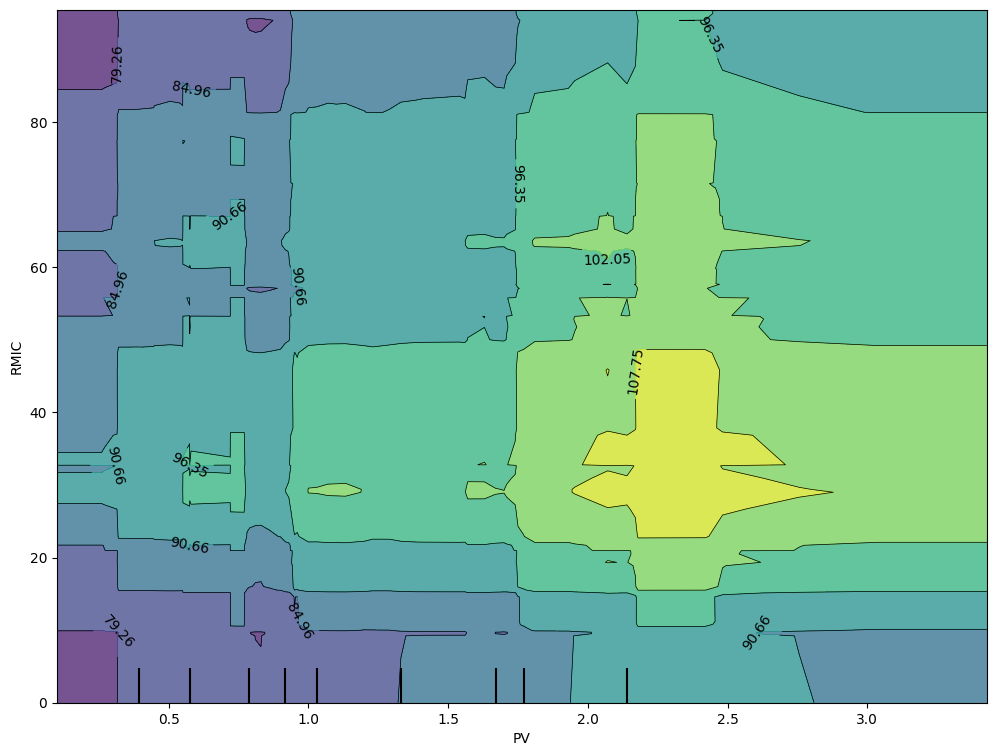

In [2]:
from sklearn.inspection import PartialDependenceDisplay
import numpy as np
from matplotlib import pyplot as plt

# 指定要计算2D部分依赖图的特征（使用元组而不是列表）
features = ('PV', 'RMIC')

fig, ax = plt.subplots(figsize=(12, 9))
pdp_display = PartialDependenceDisplay.from_estimator(xgb, X_train, [features], ax=ax, grid_resolution=100)
pdp_display.pd_results

In [6]:
# 提取网格值和部分依赖值
grid_values = pdp_display.pd_results[0].grid_values
x_values, y_values = grid_values
average_values = pdp_display.pd_results[0].average

X_mesh, Y_mesh = np.meshgrid(x_values, y_values)

# 将数据存储为DataFrame
pdp_2d_data = pd.DataFrame({
    f'{features[0]}': X_mesh.flatten(),
    f'{features[1]}': Y_mesh.flatten(),
    'Partial Dependence': average_values.transpose().flatten()
})

In [7]:
# 保存为CSV文件
pdp_2d_data.to_csv('2D_PDP_PV_RMIC.csv', index=False)

# 显示保存路径
print("2D PDP 数据已保存到本地")

2D PDP 数据已保存到本地
